### DATA 301   Spring 2016

### Joel Braun            jsbraun@calpoly.edu
### James Ly              jly03@calpoly.edu
### Avinash Sharma  avsharma@calpoly.edu

### Final Project

### Pricing American Options by Simulation: A Comparison of Methods

In [1]:
## imports
%matplotlib inline

import numpy as np
import analysisfuncs as af
import matplotlib 
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [2]:
## parse data into dictionaries

## data for 6 months
simCallsDict = af.parseSimCalls("simcalls6M.csv")
simPutsDict = af.parseSimPuts("simputs6M.csv")

## data for 1 week
simCallsWDict = af.parseSimCalls("simcalls1W.csv")
simPutsWDict = af.parseSimPuts("simputs1W.csv")

## Call Options Dataset
### Question 1: Black-Scholes vs. Binomial
### Which options pricing class provides better accuracy?

<b>black-scholes accuracies</b>

In [3]:
## create lists to run accuracy functions on
bsNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland']
bsReal = []
bsEstimates = []
bsSSE = []
bsAvgSSE = []
bsTAcc = []
bsSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simCallsDict, 2)
bsReal.append(baroneReal)
bsEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simCallsDict, 3)
bsReal.append(bjerksundReal)
bsEstimates.append(bjerksundEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(bsNames)):
    print(bsNames[i])
    bsSSE.append(af.sse(bsEstimates[i], bsReal[i]))
    bsAvgSSE.append(af.avgSSE(bsEstimates[i], bsReal[i]))
    bsTAcc.append(af.thresholdAcc(bsEstimates[i], bsReal[i], epsilon))
    bsSAcc.append(af.sentimentAcc(bsEstimates[i], bsReal[i]))
    print("sse:",bsSSE[i])
    print("avg sse:",bsAvgSSE[i])
    print("threshold acc:", bsTAcc[i],"%")
    print("sentiment acc:", bsSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %



#### Visualizations of Black-Scholes Accuracies

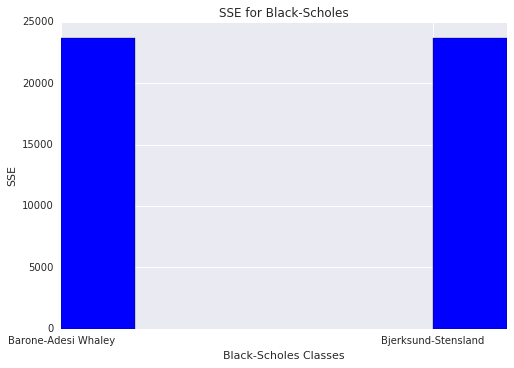

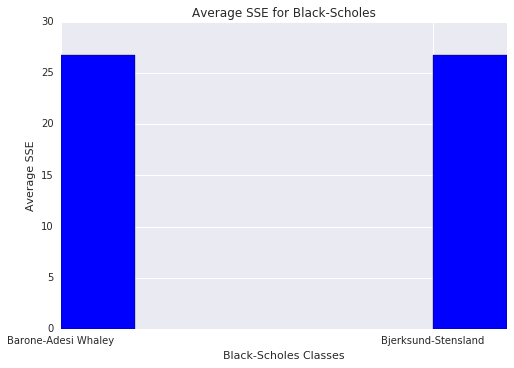

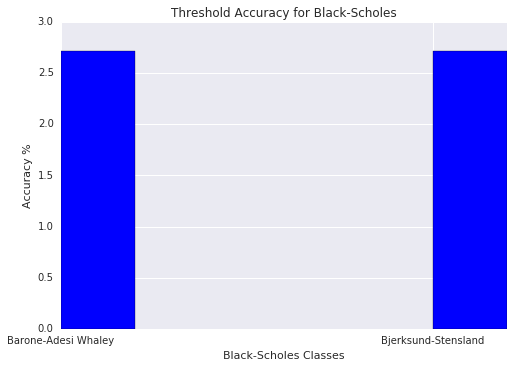

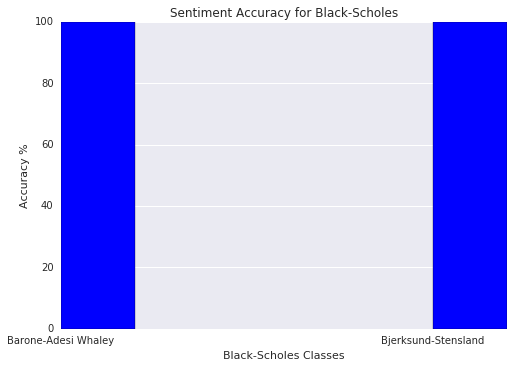

In [4]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(bsNames)):
    names += (bsNames[i],)
    sse += (bsSSE[i],)
    avgSSE += (bsAvgSSE[i],)
    tAcc += (bsTAcc[i],)
    sAcc += (bsSAcc[i],)

width = 0.2
i = np.arange(len(bsNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for threshold accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

#plot histogram for sentiment accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

<b>Bionomial Accuracies</b>

In [5]:
## create lists to run accuracy functions on
binNames = ['Cox-Ross-Rubenstein', 'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
binReal = []
binEstimates = []
binSSE = []
binAvgSSE = []
binTAcc = []
binSAcc = []

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simCallsDict, 4)
binReal.append(coxReal)
binEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simCallsDict, 5)
binReal.append(jarrowReal)
binEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simCallsDict, 6)
binReal.append(equalReal)
binEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simCallsDict, 7)
binReal.append(trigeorgisReal)
binEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simCallsDict, 8)
binReal.append(tianReal)
binEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simCallsDict, 9)
binReal.append(leisenReal)
binEstimates.append(leisenEstimates)

## run accuracy functions on real and estimate prices
epsilon = 0.1
for i in range(len(binNames)):
    print(binNames[i])
    binSSE.append(af.sse(binEstimates[i], binReal[i]))
    binAvgSSE.append(af.avgSSE(binEstimates[i], binReal[i]))
    binTAcc.append(af.thresholdAcc(binEstimates[i], binReal[i], epsilon))
    binSAcc.append(af.sentimentAcc(binEstimates[i], binReal[i]))
    print("sse:",binSSE[i])
    print("avg sse:",binAvgSSE[i])
    print("threshold acc:", binTAcc[i],"%")
    print("sentiment acc:", binSAcc[i],"%\n")

Cox-Ross-Rubenstein
sse: 23674.3562108
avg sse: 26.7506849839
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 23674.5639832
avg sse: 26.750919755
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 23709.3509718
avg sse: 26.7902270867
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Trigeorgis
sse: 23674.8455342
avg sse: 26.7512378918
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Tian
sse: 23673.9834955
avg sse: 26.7502638367
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 23672.7277183
avg sse: 26.7488448795
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %



#### Visualizations of Binomial Accuracies

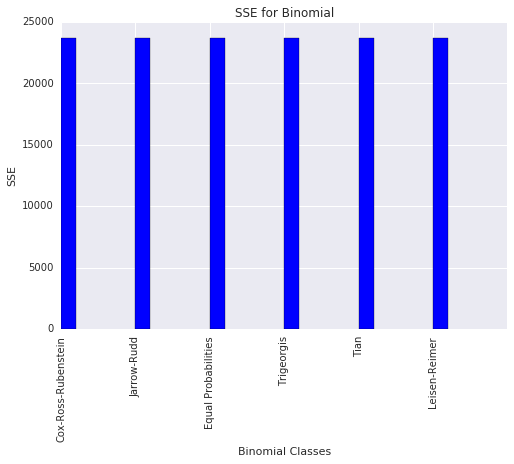

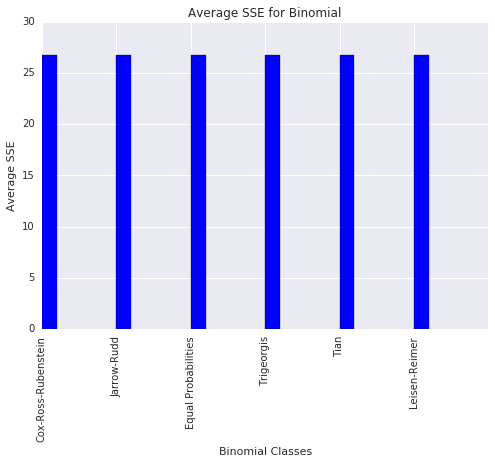

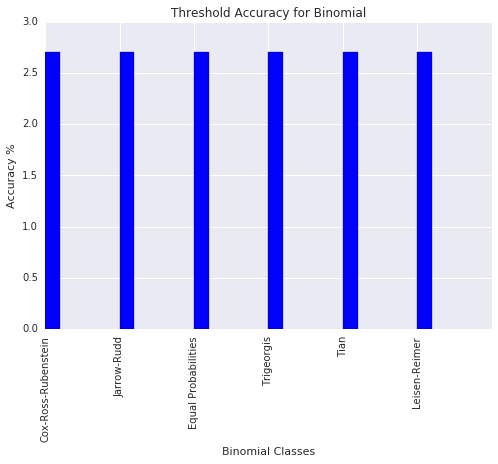

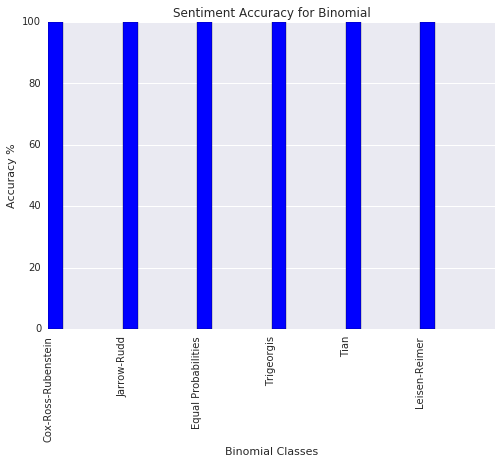

In [6]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(binNames)):
    names += (binNames[i],)
    sse += (binSSE[i],)
    avgSSE += (binAvgSSE[i],)
    tAcc += (binTAcc[i],)
    sAcc += (binSAcc[i],)

width = 0.2
i = np.arange(len(binNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 1

Based on the results above, the accuracies for the for Black-Scholes and Binomial classes seem very similiar. The sum squared error for all of them seems to be around 23,672. The average sum squared error also seems to be around 26.75. The threshold accuracy for all of them seems to around 2.7% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 100%. Based on these results there does not seem to be one class that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.

### Question 2: Short term accuracy
### Which options pricing model is the most accurate in the short term?

#### Pricing model accuracies over 1 week

In [7]:
## create lists to run accuracy functions on
pmNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland','Cox-Ross-Rubenstein', 
           'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
pmReal = []
pmEstimates = []
pmSSE = []
pmAvgSSE = []
pmTAcc = []
pmSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simCallsWDict, 2)
pmReal.append(baroneReal)
pmEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simCallsWDict, 3)
pmReal.append(bjerksundReal)
pmEstimates.append(bjerksundEstimates)

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simCallsWDict, 4)
pmReal.append(coxReal)
pmEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simCallsWDict, 5)
pmReal.append(jarrowReal)
pmEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simCallsWDict, 6)
pmReal.append(equalReal)
pmEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simCallsWDict, 7)
pmReal.append(trigeorgisReal)
pmEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simCallsWDict, 8)
pmReal.append(tianReal)
pmEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simCallsWDict, 9)
pmReal.append(leisenReal)
pmEstimates.append(leisenEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(pmNames)):
    print(pmNames[i])
    pmSSE.append(af.sse(pmEstimates[i], pmReal[i]))
    pmAvgSSE.append(af.avgSSE(pmEstimates[i], pmReal[i]))
    pmTAcc.append(af.thresholdAcc(pmEstimates[i], pmReal[i], epsilon))
    pmSAcc.append(af.sentimentAcc(pmEstimates[i], pmReal[i]))
    print("sse:",pmSSE[i])
    print("avg sse:",pmAvgSSE[i])
    print("threshold acc:", pmTAcc[i],"%")
    print("sentiment acc:", pmSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 1012.52692573
avg sse: 1.727861648
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 1012.52692573
avg sse: 1.727861648
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Cox-Ross-Rubenstein
sse: 1012.56930796
avg sse: 1.72793397263
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 1012.55661224
avg sse: 1.72791230758
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 1012.67371546
avg sse: 1.72811214243
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Trigeorgis
sse: 1012.55670405
avg sse: 1.72791246425
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Tian
sse: 1012.55110951
avg sse: 1.72790291726
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 1012.5269029
avg sse: 1.72786160904
threshold acc: 20.30716723549488 %
sentiment acc: 100.0 %



#### Visualizations for Pricing models over 1 week

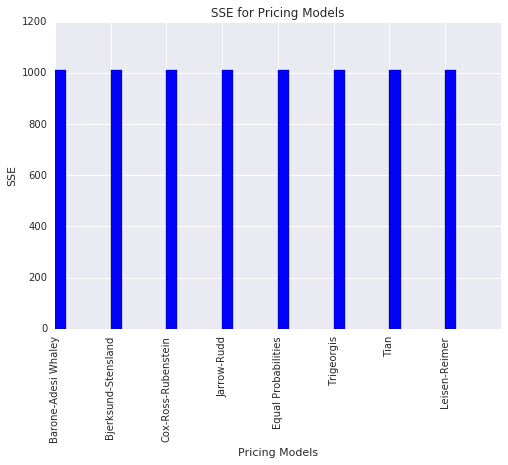

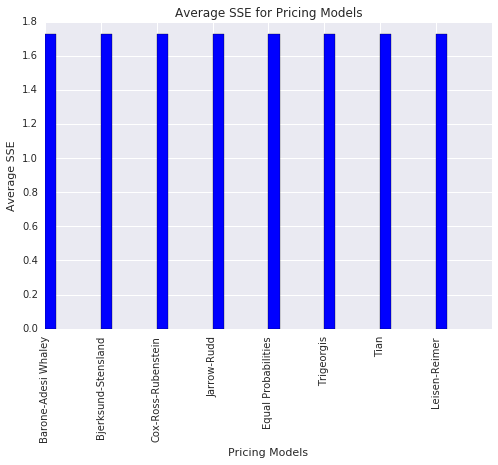

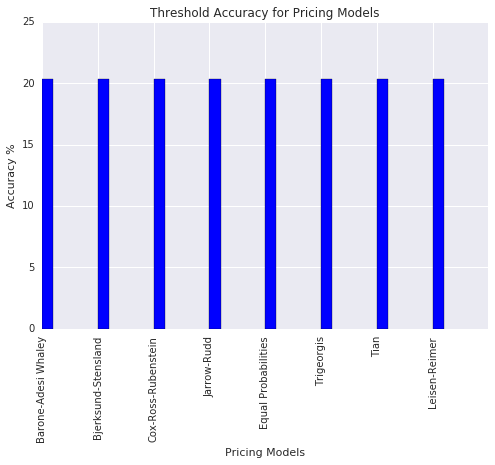

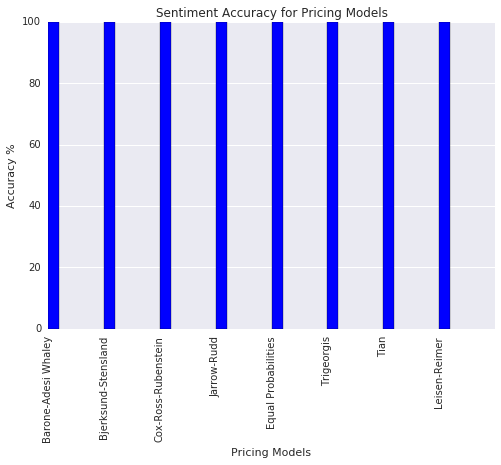

In [8]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(pmNames)):
    names += (pmNames[i],)
    sse += (pmSSE[i],)
    avgSSE += (pmAvgSSE[i],)
    tAcc += (pmTAcc[i],)
    sAcc += (pmSAcc[i],)

width = 0.2
i = np.arange(len(pmNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 2

Based on the results above, the accuracies for the for the pricing models over one week seem very similiar. The sum squared error for all of them seems to be around 1,012.5. The average sum squared error also seems to be around 1.73. The threshold accuracy for all of them seems to around 20% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 100%. Based on these results there does not seem to be one pricing model that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.

### Question 3: Long term accuracy
### Which options pricing model is the most accurate in the long term?

#### Pricing model accuracies over 6 months

In [9]:
## create lists to run accuracy functions on
pmNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland','Cox-Ross-Rubenstein', 
           'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
pmReal = []
pmEstimates = []
pmSSE = []
pmAvgSSE = []
pmTAcc = []
pmSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simCallsDict, 2)
pmReal.append(baroneReal)
pmEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simCallsDict, 3)
pmReal.append(bjerksundReal)
pmEstimates.append(bjerksundEstimates)

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simCallsDict, 4)
pmReal.append(coxReal)
pmEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simCallsDict, 5)
pmReal.append(jarrowReal)
pmEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simCallsDict, 6)
pmReal.append(equalReal)
pmEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simCallsDict, 7)
pmReal.append(trigeorgisReal)
pmEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simCallsDict, 8)
pmReal.append(tianReal)
pmEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simCallsDict, 9)
pmReal.append(leisenReal)
pmEstimates.append(leisenEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(pmNames)):
    print(pmNames[i])
    pmSSE.append(af.sse(pmEstimates[i], pmReal[i]))
    pmAvgSSE.append(af.avgSSE(pmEstimates[i], pmReal[i]))
    pmTAcc.append(af.thresholdAcc(pmEstimates[i], pmReal[i], epsilon))
    pmSAcc.append(af.sentimentAcc(pmEstimates[i], pmReal[i]))
    print("sse:",pmSSE[i])
    print("avg sse:",pmAvgSSE[i])
    print("threshold acc:", pmTAcc[i],"%")
    print("sentiment acc:", pmSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Cox-Ross-Rubenstein
sse: 23674.3562108
avg sse: 26.7506849839
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 23674.5639832
avg sse: 26.750919755
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 23709.3509718
avg sse: 26.7902270867
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Trigeorgis
sse: 23674.8455342
avg sse: 26.7512378918
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Tian
sse: 23673.9834955
avg sse: 26.7502638367
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 23672.7277183
avg sse: 26.7488448795
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %



#### Visualization for Pricing models 6 months

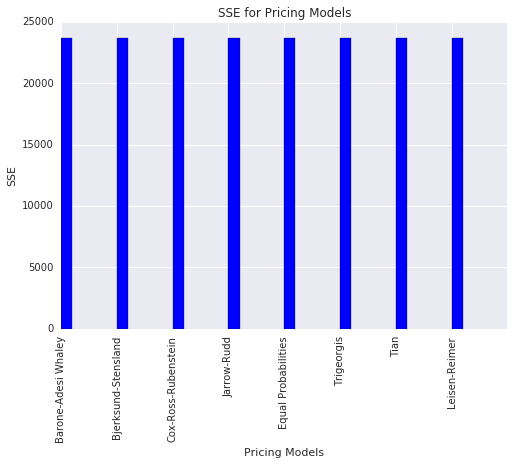

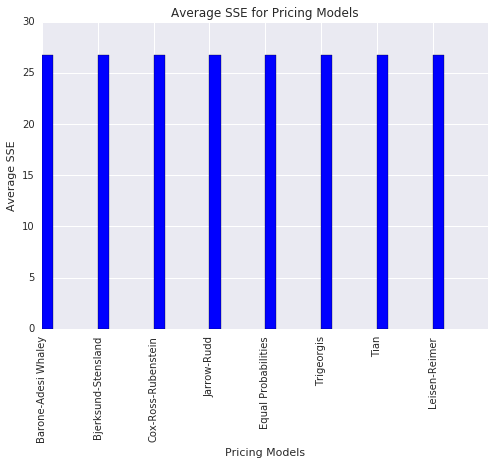

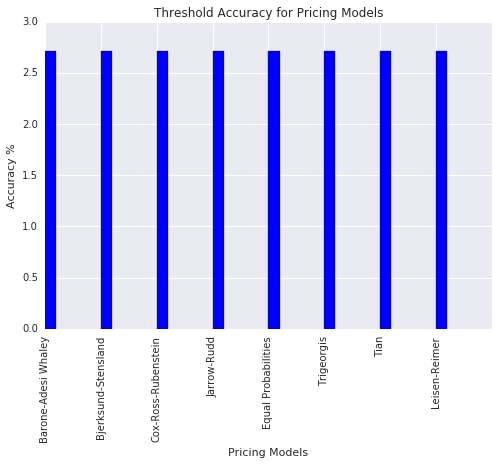

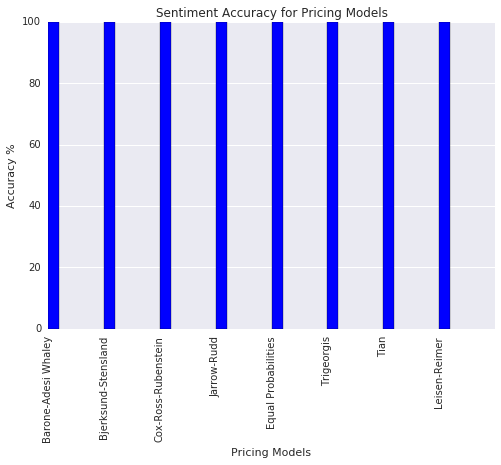

In [10]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(pmNames)):
    names += (pmNames[i],)
    sse += (pmSSE[i],)
    avgSSE += (pmAvgSSE[i],)
    tAcc += (pmTAcc[i],)
    sAcc += (pmSAcc[i],)

width = 0.2
i = np.arange(len(pmNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 3

Based on the results above, the accuracies for the for the pricing models over six months seem very similiar. The sum squared error for all of them seems to be around 23,673. The average sum squared error also seems to be around 26.75. The threshold accuracy for all of them seems to around 2.71% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 100%. Based on these results there does not seem to be one pricing model that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.

## Put Options Dataset
### Question 1: Black-Scholes vs. Binomial
### Which options pricing class provides better accuracy?

<b>black-scholes accuracies</b>

In [11]:
## create lists to run accuracy functions on
bsNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland']
bsReal = []
bsEstimates = []
bsSSE = []
bsAvgSSE = []
bsTAcc = []
bsSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simPutsDict, 2)
bsReal.append(baroneReal)
bsEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simPutsDict, 3)
bsReal.append(bjerksundReal)
bsEstimates.append(bjerksundEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(bsNames)):
    print(bsNames[i])
    bsSSE.append(af.sse(bsEstimates[i], bsReal[i]))
    bsAvgSSE.append(af.avgSSE(bsEstimates[i], bsReal[i]))
    bsTAcc.append(af.thresholdAcc(bsEstimates[i], bsReal[i], epsilon))
    bsSAcc.append(af.sentimentAcc(bsEstimates[i], bsReal[i]))
    print("sse:",bsSSE[i])
    print("avg sse:",bsAvgSSE[i])
    print("threshold acc:", bsTAcc[i],"%")
    print("sentiment acc:", bsSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 18140.7701791
avg sse: 19.7611875589
threshold acc: 13.28976034858388 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 18075.5458258
avg sse: 19.6901370652
threshold acc: 13.398692810457517 %
sentiment acc: 100.0 %



#### Visualizations for Black-Scholes Accuracies

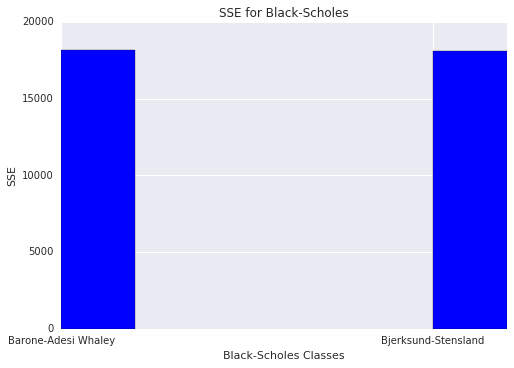

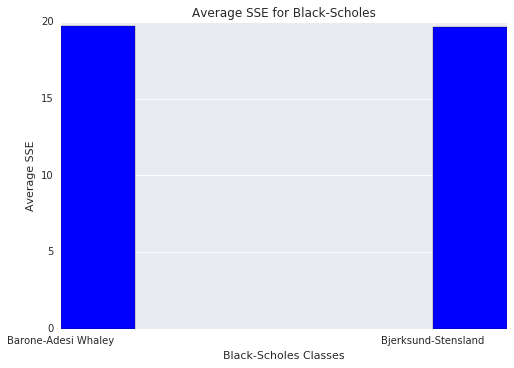

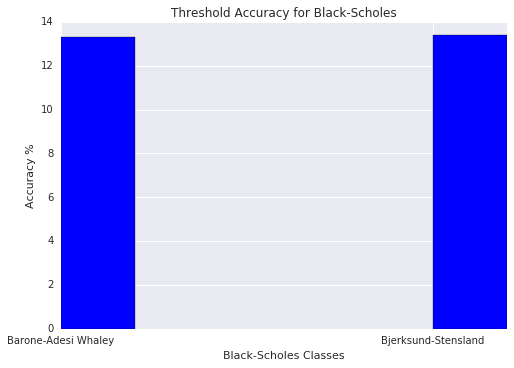

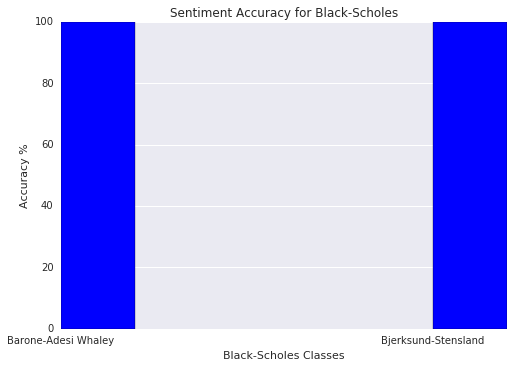

In [12]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(bsNames)):
    names += (bsNames[i],)
    sse += (bsSSE[i],)
    avgSSE += (bsAvgSSE[i],)
    tAcc += (bsTAcc[i],)
    sAcc += (bsSAcc[i],)

width = 0.2
i = np.arange(len(bsNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for threshold accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

#plot histogram for sentiment accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Black-Scholes')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

<b>binomial accuracies</b>

In [13]:
## create lists to run accuracy functions on
binNames = ['Cox-Ross-Rubenstein', 'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
binReal = []
binEstimates = []
binSSE = []
binAvgSSE = []
binTAcc = []
binSAcc = []

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simPutsDict, 4)
binReal.append(coxReal)
binEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simPutsDict, 5)
binReal.append(jarrowReal)
binEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simPutsDict, 6)
binReal.append(equalReal)
binEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simPutsDict, 7)
binReal.append(trigeorgisReal)
binEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simPutsDict, 8)
binReal.append(tianReal)
binEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simPutsDict, 9)
binReal.append(leisenReal)
binEstimates.append(leisenEstimates)

## run accuracy functions on real and estimate prices
epsilon = 0.1
for i in range(len(binNames)):
    print(binNames[i])
    binSSE.append(af.sse(binEstimates[i], binReal[i]))
    binAvgSSE.append(af.avgSSE(binEstimates[i], binReal[i]))
    binTAcc.append(af.thresholdAcc(binEstimates[i], binReal[i], epsilon))
    binSAcc.append(af.sentimentAcc(binEstimates[i], binReal[i]))
    print("sse:",binSSE[i])
    print("avg sse:",binAvgSSE[i])
    print("threshold acc:", binTAcc[i],"%")
    print("sentiment acc:", binSAcc[i],"%\n")

Cox-Ross-Rubenstein
sse: 18103.5767171
avg sse: 19.7206718052
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 18103.1678703
avg sse: 19.7202264382
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 18108.5728432
avg sse: 19.7261142083
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Trigeorgis
sse: 18103.1853678
avg sse: 19.7202454987
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Tian
sse: 18102.6401136
avg sse: 19.7196515399
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 18102.9611324
avg sse: 19.7200012335
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %



#### Visualizations for Binomial Accuracies

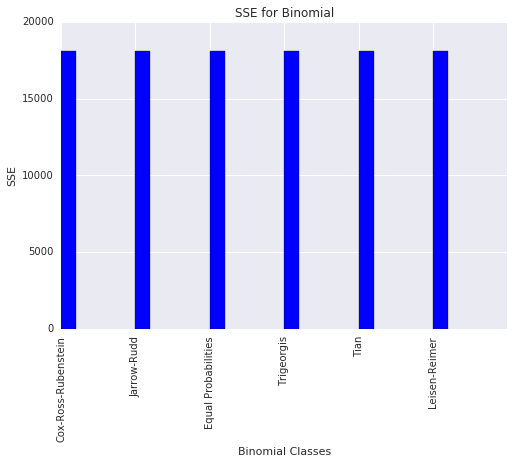

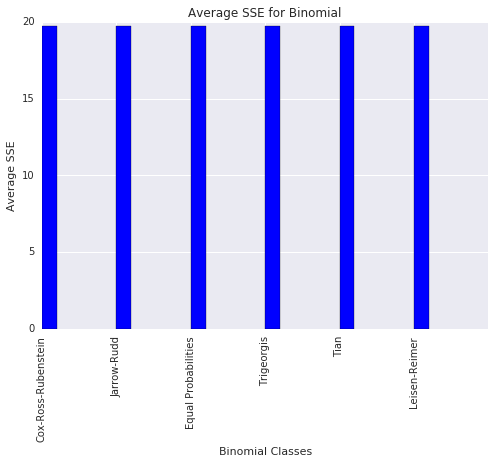

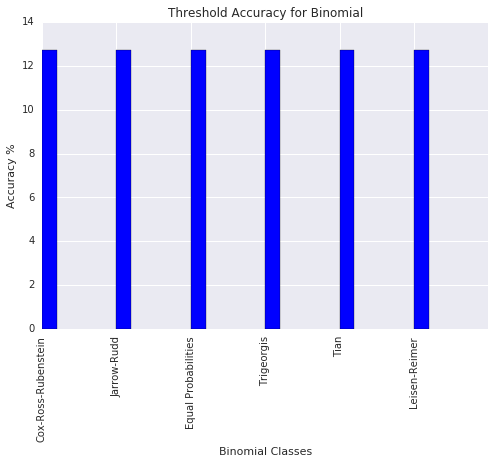

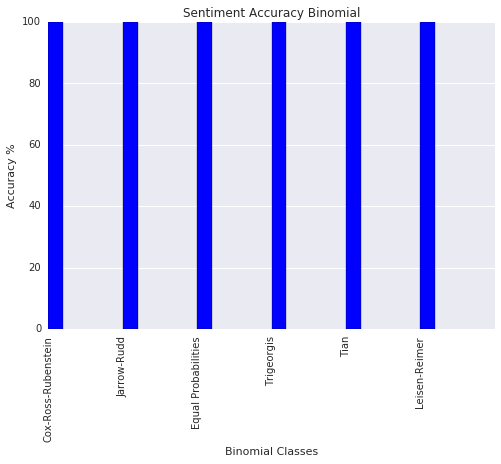

In [14]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(binNames)):
    names += (binNames[i],)
    sse += (binSSE[i],)
    avgSSE += (binAvgSSE[i],)
    tAcc += (binTAcc[i],)
    sAcc += (binSAcc[i],)

width = 0.2
i = np.arange(len(binNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy Binomial')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 1

Based on the results above, the accuracies for the for Black-Scholes and Binomial classes seem very similiar. The sum squared error for all of them seems to be around 18,103. The average sum squared error also seems to be around 19.72. The threshold accuracy for all of them seems to around 12.75% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 30%. Based on these results there does not seem to be one class that is better than the other when it comes to estimating the real price of the put options. All these estimations seem to general have the same amount of error.

#### Question 2: Short term accuracy
#### Which options pricing model is the most accurate in the short term?

#### Pricing model accuracies over 1 week

In [15]:
## create lists to run accuracy functions on
pmNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland','Cox-Ross-Rubenstein', 
           'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
pmReal = []
pmEstimates = []
pmSSE = []
pmAvgSSE = []
pmTAcc = []
pmSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simPutsWDict, 2)
pmReal.append(baroneReal)
pmEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simPutsWDict, 3)
pmReal.append(bjerksundReal)
pmEstimates.append(bjerksundEstimates)

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simPutsWDict, 4)
pmReal.append(coxReal)
pmEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simPutsWDict, 5)
pmReal.append(jarrowReal)
pmEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simPutsWDict, 6)
pmReal.append(equalReal)
pmEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simPutsWDict, 7)
pmReal.append(trigeorgisReal)
pmEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simPutsWDict, 8)
pmReal.append(tianReal)
pmEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simPutsWDict, 9)
pmReal.append(leisenReal)
pmEstimates.append(leisenEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(pmNames)):
    print(pmNames[i])
    pmSSE.append(af.sse(pmEstimates[i], pmReal[i]))
    pmAvgSSE.append(af.avgSSE(pmEstimates[i], pmReal[i]))
    pmTAcc.append(af.thresholdAcc(pmEstimates[i], pmReal[i], epsilon))
    pmSAcc.append(af.sentimentAcc(pmEstimates[i], pmReal[i]))
    print("sse:",pmSSE[i])
    print("avg sse:",pmAvgSSE[i])
    print("threshold acc:", pmTAcc[i],"%")
    print("sentiment acc:", pmSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 621.042756323
avg sse: 0.953982728607
threshold acc: 35.483870967741936 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 621.143549588
avg sse: 0.95413755697
threshold acc: 35.33026113671275 %
sentiment acc: 99.84639016897081 %

Cox-Ross-Rubenstein
sse: 621.456693431
avg sse: 0.954618576699
threshold acc: 35.02304147465438 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 621.466521929
avg sse: 0.954633674239
threshold acc: 35.02304147465438 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 621.466499545
avg sse: 0.954633639854
threshold acc: 35.02304147465438 %
sentiment acc: 100.0 %

Trigeorgis
sse: 621.466543133
avg sse: 0.954633706809
threshold acc: 35.02304147465438 %
sentiment acc: 100.0 %

Tian
sse: 621.477662079
avg sse: 0.954650786603
threshold acc: 35.02304147465438 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 621.437587395
avg sse: 0.954589227949
threshold acc: 35.17665130568356 %
sentiment acc: 100.0 %



#### Visualizations for Pricing model accuracies over 1 week

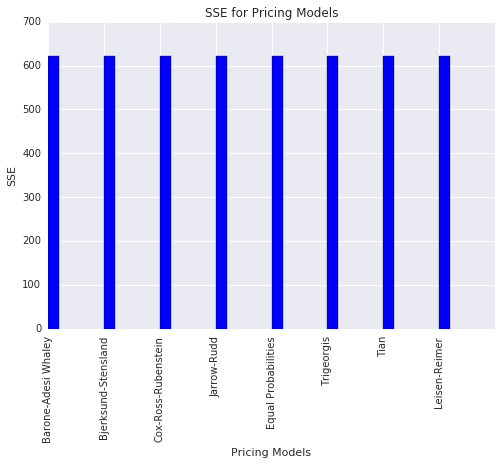

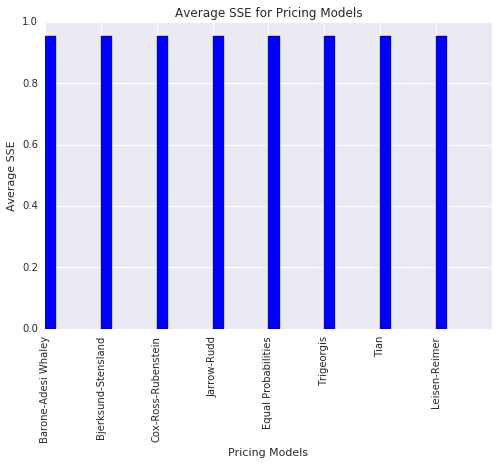

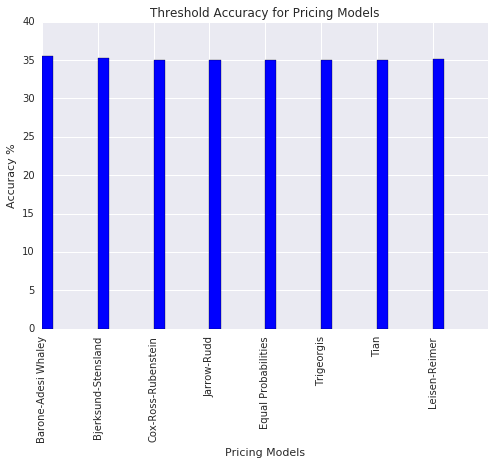

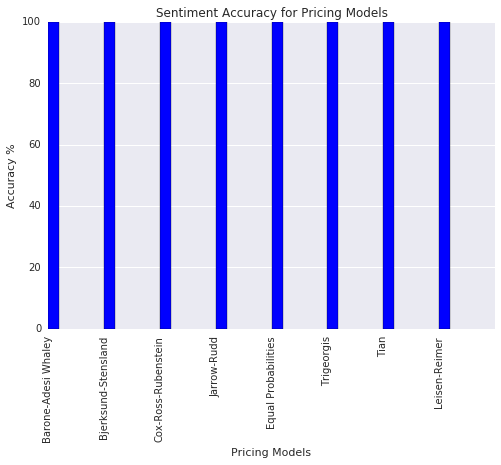

In [16]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(pmNames)):
    names += (pmNames[i],)
    sse += (pmSSE[i],)
    avgSSE += (pmAvgSSE[i],)
    tAcc += (pmTAcc[i],)
    sAcc += (pmSAcc[i],)

width = 0.2
i = np.arange(len(pmNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 2

Based on the results above, the accuracies for the for the pricing models over one week seem very similiar. The sum squared error for all of them seems to be around 621.5. The average sum squared error also seems to be around 0.95. The threshold accuracy for all of them seems to around 35% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 100%. Based on these results there does not seem to be one pricing model that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.

#### Question 3: Long term accuracy
#### Which options pricing model is the most accurate in the long term?

#### Pricing model accuracies over 6 months

In [17]:
## create lists to run accuracy functions on
pmNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland','Cox-Ross-Rubenstein', 
           'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
pmReal = []
pmEstimates = []
pmSSE = []
pmAvgSSE = []
pmTAcc = []
pmSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simPutsDict, 2)
pmReal.append(baroneReal)
pmEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simPutsDict, 3)
pmReal.append(bjerksundReal)
pmEstimates.append(bjerksundEstimates)

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simPutsDict, 4)
pmReal.append(coxReal)
pmEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simPutsDict, 5)
pmReal.append(jarrowReal)
pmEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simPutsDict, 6)
pmReal.append(equalReal)
pmEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simPutsDict, 7)
pmReal.append(trigeorgisReal)
pmEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simPutsDict, 8)
pmReal.append(tianReal)
pmEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simPutsDict, 9)
pmReal.append(leisenReal)
pmEstimates.append(leisenEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(pmNames)):
    print(pmNames[i])
    pmSSE.append(af.sse(pmEstimates[i], pmReal[i]))
    pmAvgSSE.append(af.avgSSE(pmEstimates[i], pmReal[i]))
    pmTAcc.append(af.thresholdAcc(pmEstimates[i], pmReal[i], epsilon))
    pmSAcc.append(af.sentimentAcc(pmEstimates[i], pmReal[i]))
    print("sse:",pmSSE[i])
    print("avg sse:",pmAvgSSE[i])
    print("threshold acc:", pmTAcc[i],"%")
    print("sentiment acc:", pmSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 18140.7701791
avg sse: 19.7611875589
threshold acc: 13.28976034858388 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 18075.5458258
avg sse: 19.6901370652
threshold acc: 13.398692810457517 %
sentiment acc: 100.0 %

Cox-Ross-Rubenstein
sse: 18103.5767171
avg sse: 19.7206718052
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 18103.1678703
avg sse: 19.7202264382
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 18108.5728432
avg sse: 19.7261142083
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Trigeorgis
sse: 18103.1853678
avg sse: 19.7202454987
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Tian
sse: 18102.6401136
avg sse: 19.7196515399
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 18102.9611324
avg sse: 19.7200012335
threshold acc: 12.745098039215685 %
sentiment acc: 100.0 %



#### Visualizations for Pricing model accuracies over 6 months

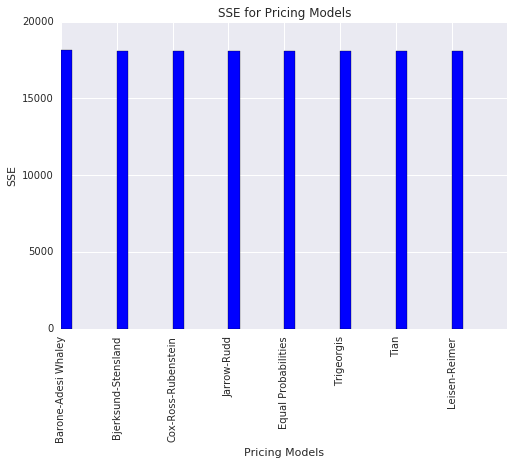

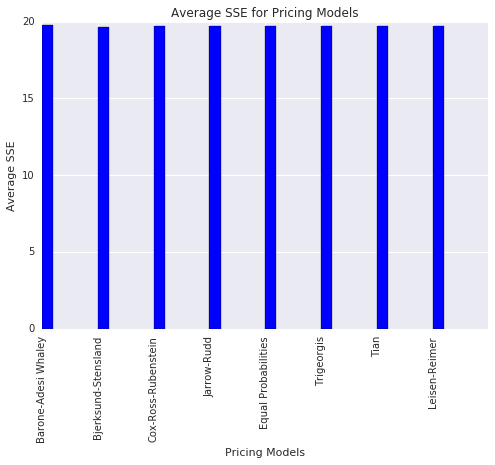

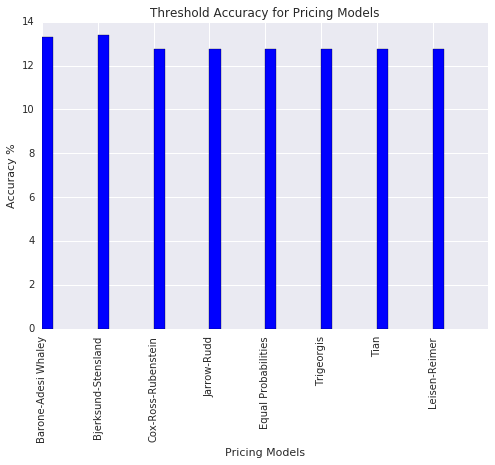

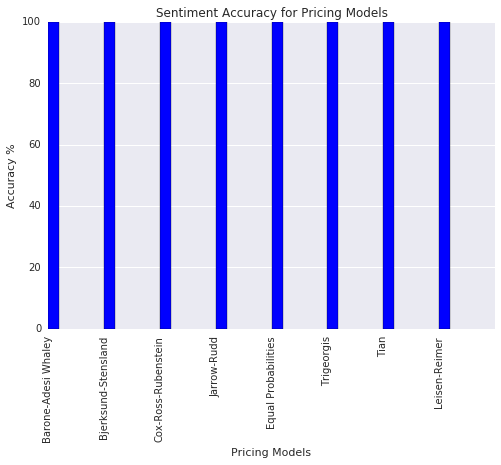

In [18]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(pmNames)):
    names += (pmNames[i],)
    sse += (pmSSE[i],)
    avgSSE += (pmAvgSSE[i],)
    tAcc += (pmTAcc[i],)
    sAcc += (pmSAcc[i],)

width = 0.2
i = np.arange(len(pmNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Accuracy for Pricing Models')
plot.set_xlabel('Pricing Models')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 3

Based on the results above, the accuracies for the for the pricing models over six months seem very similiar. The sum squared error for all of them seems to be around 18,103. The average sum squared error also seems to be around 19.72. The threshold accuracy for all of them seems to around 12.75% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 100%. Based on these results there does not seem to be one pricing model that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.